<a href="https://colab.research.google.com/github/goswamimohit/Hello/blob/goswamimohit-oddinschool/Project%20in%20Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
In_Stock_IMUS = '/df1_stock.csv'

In [3]:
df = pd.read_csv(In_Stock_IMUS)

In [ ]:
df['status'].value_counts()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713788 entries, 0 to 713787
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   category         713788 non-null  int64  
 1   manufacturer     713788 non-null  object 
 2   part_number      713788 non-null  object 
 3   sku              713788 non-null  object 
 4   alt_sku          8242 non-null    object 
 5   description      713788 non-null  object 
 6   status           713788 non-null  object 
 7   qty              713788 non-null  int64  
 8   price            713788 non-null  float64
 9   sku_create_date  713788 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 54.5+ MB


In [5]:
df.columns

Index(['category', 'manufacturer', 'part_number', 'sku', 'alt_sku',
       'description', 'status', 'qty', 'price', 'sku_create_date'],
      dtype='object')

In [8]:
df.drop(['sku', 'alt_sku','description','status'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713788 entries, 0 to 713787
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   category      713788 non-null  category      
 1   manufacturer  713788 non-null  object        
 2   product       713788 non-null  object        
 3   qty           713788 non-null  int64         
 4   price         713788 non-null  float64       
 5   date          713788 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 28.6+ MB


In [10]:
df = df.astype({"category":'category'})

In [12]:
df['sku_create_date'] = pd.to_datetime(df['sku_create_date'])

In [14]:
df = df.rename(columns={'sku_create_date': 'date', 'part_number': 'product'})

In [16]:
df.describe()

,qty,price
count,713788.000000,713788.000000
mean,152.365662,158.543729
std,1105.661017,553.645433
min,1.000000,0.000000
25%,8.000000,9.640000
50%,26.000000,28.060000
75%,89.000000,99.340000
max,60063.000000,69729.030000


In [17]:
df.isnull().sum()

category        0
manufacturer    0
product         0
qty             0
price           0
date            0
dtype: int64

In [20]:
 df.to_csv('better_imus_stock_data.csv', index=False)

# Python Project


In [19]:
df.head()

,category,manufacturer,product,qty,price,date
0,9920,CASE LOGIC-PERSONAL & PORTABLE,3200943,7,99.00,2020-08-17
1,531,OMNITRON SYSTEMS,7206-0,2,59.09,2020-08-17
2,9070,ZEBRA ENTERPRISE MCD-A1,SAC5070-800CR,3,500.06,2020-08-17
3,9080,ZEBRA ENTERPRISE MCD-A1,KT-CLMPT-RS507-01R,115,86.34,2020-08-17
4,9080,ZEBRA ENTERPRISE MCD-A1,KT-PAD-RS507-10R,42,51.80,2020-08-17


## For data In Stock:

1. Which are the top Manufacturers with price, quantity?

2. Which are the most profitable products?
Based on Total Price 

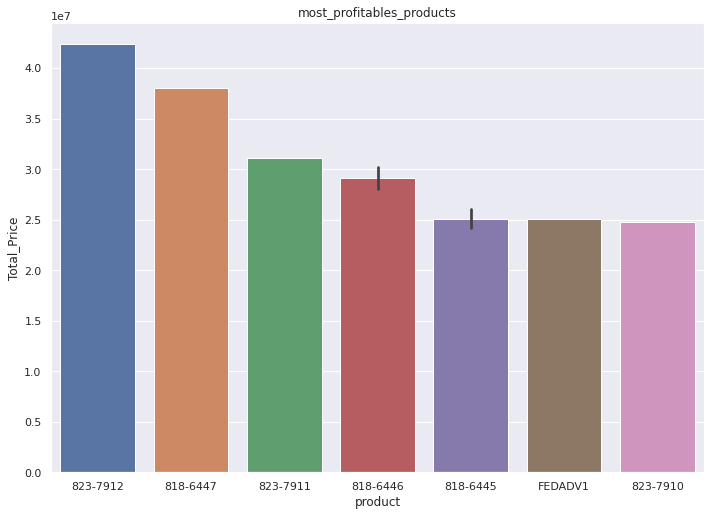

In [82]:
profit = sns.barplot(x = 'product',y = 'Total_Price',data = most_profitable_products).set(title='most_profitables_products')

In [ ]:
most_profitable_products['product']

In [ ]:
df.columns

In [22]:
df['Total_Price'] =df['qty']*df['price']

In [ ]:
df.head()

In [91]:
df0 = df.groupby(['product','Total_Price'])

In [92]:
df1 = df0.sum().sort_values(by='Total_Price',ascending=[False])[:10]

In [ ]:
[df1.drop(['qty', 'price'], axis=1, inplace=True)

In [63]:
most_profitable_products = df1.reset_index()

In [ ]:
df1

In [ ]:
most_profitable_products

3. Which is the product where you have seen a decrease in the price?

4. Which is the product where you have seen an increase in the price?


5. Which is the top category by price and quantity?



6. Which products are aging?

[Text(0.5, 1.0, 'aging_products')]

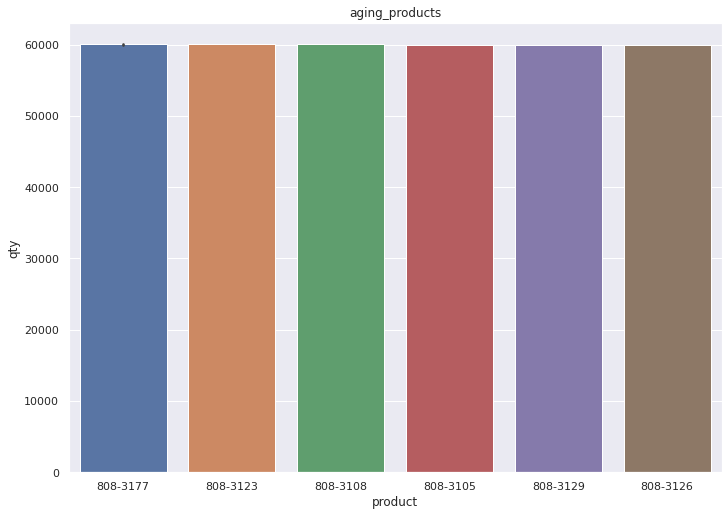

In [98]:
sns.barplot(x = 'product',y = 'qty',data = aging_products).set(title='aging_products')

In [84]:
df.head()

,category,manufacturer,product,qty,price,date,Total_Price
0,9920,CASE LOGIC-PERSONAL & PORTABLE,3200943,7,99.00,2020-08-17,693.00
1,531,OMNITRON SYSTEMS,7206-0,2,59.09,2020-08-17,118.18
2,9070,ZEBRA ENTERPRISE MCD-A1,SAC5070-800CR,3,500.06,2020-08-17,1500.18
3,9080,ZEBRA ENTERPRISE MCD-A1,KT-CLMPT-RS507-01R,115,86.34,2020-08-17,9929.10
4,9080,ZEBRA ENTERPRISE MCD-A1,KT-PAD-RS507-10R,42,51.80,2020-08-17,2175.60


In [89]:
df4 = df.groupby(['product','qty'])

In [90]:
df5 = df4.sum().sort_values(by='qty',ascending=[False])[:10]

In [93]:
df5

price  Total_Price
product  qty                       
808-3177 60063   38.76   2328041.88
808-3123 60018  129.96   7799939.28
808-3108 60014  136.42   8187109.88
808-3105 60005   84.24   5054821.20
         60004   84.06   5043936.24
         60002   84.24   5054568.48
808-3177 60000   38.68   2320800.00
808-3129 59999  267.10  16025732.90
         59996  267.10  16024931.60
808-3126 59996  377.07  22622691.72

In [94]:
df5.drop(['price', 'Total_Price'], axis=1, inplace=True)

In [95]:
df5

Empty DataFrame
Columns: []
Index: [(808-3177, 60063), (808-3123, 60018), (808-3108, 60014), (808-3105, 60005), (808-3105, 60004), (808-3105, 60002), (808-3177, 60000), (808-3129, 59999), (808-3129, 59996), (808-3126, 59996)]

In [96]:
aging_products = df5.reset_index()

In [ ]:
sns.barplot(x = 'product',y = 'qty',data = aging_products).set(title='aging_products')

7. How to Decrease Product aging?